In [39]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from tqdm import tqdm
from collections import defaultdict
import math
import os
import librosa

In [51]:
val_path = '/home/willbo/data/dcase/val'
test_path = '/home/willbo/data/dcase/test'

tick_rate = 3000

In [53]:
'''
Process model prediction csv into a dict of binary valued arrays with file names as key
'''

def prediction_to_array(csv_path, set_path):
    
    increment = 1.0/tick_rate
    
    pred_dict = defaultdict(list)
    pred_dict_array = {}
    
    predictions_file = open(csv_path, newline='')
    predictions_reader = csv.reader(predictions_file, delimiter=',')
    predictions = []
    for e in predictions_reader:
        predictions.append(e)
    
    for i in range(1,len(predictions)):
        pred_dict[predictions[i][0]].append([predictions[i][1], predictions[i][2]])
    
    print('Processing prediction file: '+csv_path)
    for key in tqdm(pred_dict.keys()):

        #Go from onset offset predictions to array with binary elements indicating events
        index = 0.0
        i = 0
        prediction_array = np.zeros(math.floor(librosa.get_duration(filename=os.path.join(set_path, key))/increment))
        for event in pred_dict[key]:
            while index < float(event[0]):
                prediction_array[i] = 0
                index += increment
                i += 1
            while index < float(event[1]):
                prediction_array[i] = 1
                index += increment
                i += 1

        pred_dict_array[key] = prediction_array
        
    return pred_dict_array

In [119]:
d = prediction_to_array('/home/willbo/repos/soundscape-analysis/few_shot_learning/outputs/resnet_specaugment_spl_seed100/PP_VAL_out.csv',
                       val_path)
d.keys()

Processing prediction file: /home/willbo/repos/soundscape-analysis/few_shot_learning/outputs/resnet_specaugment_spl_seed100/PP_VAL_out.csv


100%|███████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:14<00:00,  1.79s/it]


dict_keys(['BUK5_20161101_002104a.wav', 'BUK4_20161011_000804.wav', 'a1.wav', 'BUK4_20171022_004304a.wav', 'BUK1_20181013_023504.wav', 'BUK5_20180921_015906a.wav', 'BUK1_20181011_001004.wav', 'n1.wav'])

In [85]:
def annotation_to_array(csv_path):

    increment = 1.0/tick_rate
    
    annotation_file = open(csv_path, newline='')
    annotations_reader = csv.reader(annotation_file, delimiter=',')
    annotations = []
    for e in annotations_reader:
        annotations.append(e)
        
    annotations_POS = []
    annotations_UNK = []
    
    for e in annotations:
        if e[3] == 'POS':
            annotations_POS.append([e[1], e[2]])
        elif e[3] == 'UNK':
            annotations_UNK.append([e[1], e[2]])
    
    annotations_array_POS = np.zeros(math.floor(librosa.get_duration(filename=csv_path.replace('.csv', '.wav'))/increment))
    annotations_array_UNK = np.zeros(math.floor(librosa.get_duration(filename=csv_path.replace('.csv', '.wav'))/increment))
    
    index = 0.0
    i = 0 
    
    for event in annotations_POS:
        while index < float(event[0]):
            annotations_array_POS[i] = 0
            index += increment
            i += 1
        while index < float(event[1]):
            annotations_array_POS[i] = 1
            index += increment
            i += 1
            
    index = 0.0
    i = 0
    
    for event in annotations_UNK:
        while index < float(event[0]):
            annotations_array_UNK[i] = 0
            index += increment
            i += 1
        while index < float(event[1]):
            annotations_array_UNK[i] = 1
            index += increment
            i += 1
                
    return annotations_array_POS, annotations_array_UNK

In [86]:
a_p, a_u = annotation_to_array('/home/willbo/data/dcase/val/a1.csv')

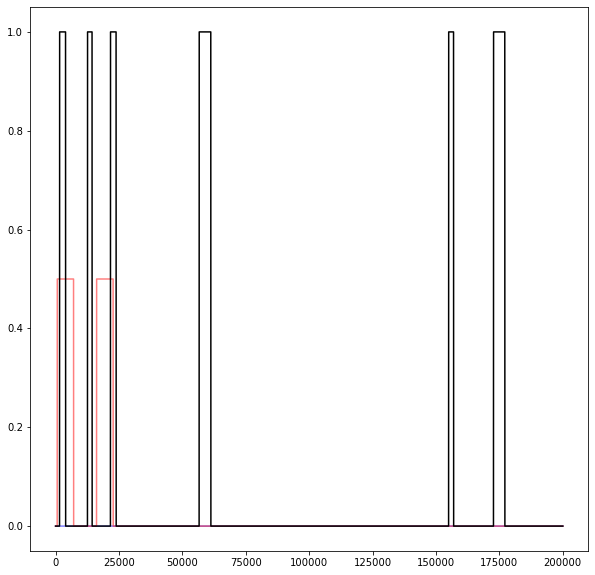

In [121]:
'''
We need to be able to see times and not tick indexes to make use of this I think.
'''

fig = plt.figure(figsize=(10,10))
plt.plot(a_p[1100000:1300000]*0.5, alpha=0.5, c='blue')
plt.plot(a_u[1100000:1300000]*0.5, c='red', alpha=0.5)
plt.plot(d['a1.wav'][1100000:1300000], c='black')

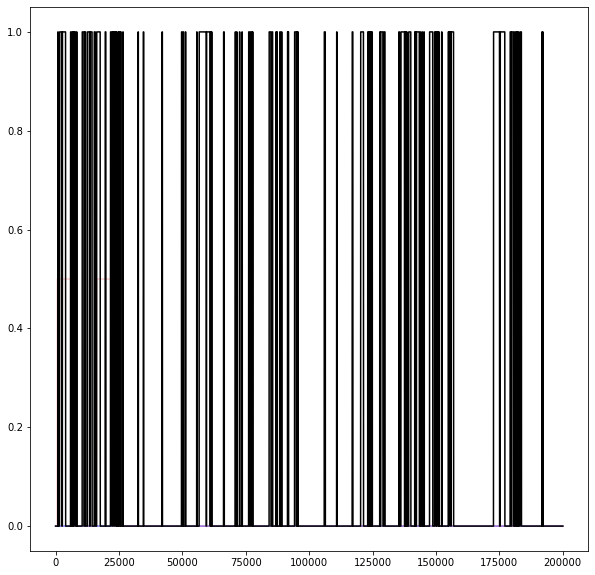

In [118]:
fig = plt.figure(figsize=(10,10))
plt.plot(a_p[1100000:1300000]*0.5, alpha=0.5, c='blue')
plt.plot(a_u[1100000:1300000]*0.5, c='red', alpha=0.2)
plt.plot(d['a1.wav'][1100000:1300000], c='black')

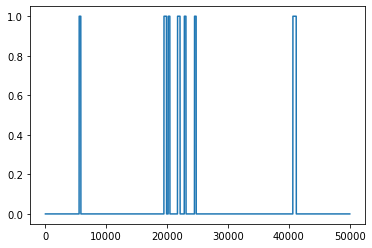

In [48]:
plt.plot(d[list(d.keys())[2]][200000:250000])

In [9]:
predictions_file = open('postprocessing/clf_TEST_out.csv', newline='')
predictions_reader = csv.reader(predictions_file, delimiter=',')
predictions = []
for e in predictions_reader:
    predictions.append(e)

In [45]:
rate = 3000
increment = 1.0/rate
pred_dict = defaultdict(list)
pred_dict_array = {}

for i in range(1,len(predictions)):
    pred_dict[predictions[i][0]].append([predictions[i][1], predictions[i][2]])
    
for key in tqdm(pred_dict.keys()):
        
    #Go from onset offset predictions to array with binary elements indicating events
    index = 0.0
    i = 0
    prediction_array = np.zeros(math.floor(librosa.get_duration(filename=os.path.join(test_path, key))/increment))
    for event in pred_dict[key]:
        while index < float(event[0]):
            prediction_array[i] = 0
            index += increment
            i += 1
        while index < float(event[1]):
            prediction_array[i] = 1
            index += increment
            i += 1
    
    pred_dict_array[key] = prediction_array

100%|█████████████████████████████████████████████████████████████████████████████████████████| 31/31 [00:08<00:00,  3.58it/s]


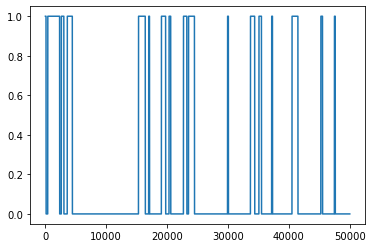

In [33]:
plt.plot(pred_dict_array[list(pred_dict_array.keys())[2]][200000:250000])

In [18]:
librosa.get_duration(filename=os.path.join(test_path, list(pred_dict_array.keys())[0]))

59.48045351473923